### Import the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Deprecated code here
print("Running without warnings!")


Running without warnings!


### Read The data

In [4]:
airline_flight_data = pd.read_csv(r"D:\Data Mining\flights.csv")

C:\Users\Ribesh Shrestha\AppData\Local\Temp\ipykernel_15904\2368218961.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  airline_flight_data = pd.read_csv(r"D:\Data Mining\flights.csv")


The warning says the the data types in columns **7** and **8** are of mixed types. Let us first explore the columns and data.

In [6]:
type(airline_flight_data)

pandas.core.frame.DataFrame

In [7]:
airline_flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
b = airline_flight_data[['YEAR','DAY']]

In [9]:
type(b)

pandas.core.frame.DataFrame

In [10]:
columns = airline_flight_data.columns

In [11]:
columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [12]:
columns = airline_flight_data.columns.tolist()

Now let us select the **7** and **8** column based on above column list.

In [14]:
airline_flight_data[[columns[7],columns[8]]]

,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,ANC,SEA
1,LAX,PBI
2,SFO,CLT
3,LAX,MIA
4,SEA,ANC
...,...,...
5819074,LAX,BOS
5819075,JFK,PSE
5819076,JFK,SJU
5819077,MCO,SJU


Let's re-read the data with consistent data type.

In [16]:
airline_flight_data = pd.read_csv(r"D:\Data Mining\flights.csv",  dtype = {'ORIGIN_AIRPORT':str,'DESTINATION_AIRPORT':str})

We can see that the warning has been mitigated now.

### Basic Statistics on Data

In [19]:
airline_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

From the above information, we can conclude that most of the columns are numeric and there are few categorical variable in the columns. The **dtype** **object** here represents categorical variable i.e. in the form of string.

In [21]:
airline_flight_data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


The statistical computations of **numerical** columns are presented above. However, the number of occurances and the presence of **categorical** variable is also an important factor. We can use the same method as above to include the statistics of **categorical** variable as well.

In [23]:
airline_flight_data.describe(include='object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,628,629,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


### Null Value Identification and Mitigation

In [25]:
airline_flight_data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

The above section shows the number of missing values in each columns. These missing values can be treated using different approaches like **filling them with a constant value**, **filling them with some statistical value** and so on.

### Filling Numerical Value with a constant number

Let us start with **WHEELS_OFF** variable. Let's explore the basic statistics of the variable first.

In [29]:
wheels_off_desc = airline_flight_data['WHEELS_OFF'].describe()

In [30]:
wheels_off_desc

count    5.730032e+06
mean     1.357171e+03
std      4.980094e+02
min      1.000000e+00
25%      9.350000e+02
50%      1.343000e+03
75%      1.754000e+03
max      2.400000e+03
Name: WHEELS_OFF, dtype: float64

In [31]:
# Convert scientific notation to a more readable format
wheels_off_desc = wheels_off_desc.apply(lambda x: '{:.2f}'.format(x))

In [32]:
wheels_off_desc

count    5730032.00
mean        1357.17
std          498.01
min            1.00
25%          935.00
50%         1343.00
75%         1754.00
max         2400.00
Name: WHEELS_OFF, dtype: object

Here, we observe that the minimum and maximum value of the variable are **1** and **2400**. Let us fill the missing values with any arbitrary number, say **1515**.

In [34]:
airline_flight_data['WHEELS_OFF'].fillna(1515, inplace=True)

In [35]:
airline_flight_data['WHEELS_OFF'].isna().sum()

0

The other equivaluent command to obtain this is: **airline_flight_data['WHEELS_OFF']= airline_flight_data['WHEELS_OFF'].fillna(1515)**

In [37]:
airline_flight_data['WHEELS_OFF'].isna().sum()

0

### Filling the missing value with Statistical value like Mean and Median

Let us start with **ARRIVAL_DELAY** variable. Let's explore the basic statistics of the variable first.

In [40]:
arrival_delay_desc = airline_flight_data['ARRIVAL_DELAY'].describe()

In [41]:
arrival_delay_desc

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [42]:
# Convert scientific notation to a more readable format
arrival_delay_desc = arrival_delay_desc.apply(lambda x: '{:.2f}'.format(x))

In [43]:
arrival_delay_desc

count    5714008.00
mean           4.41
std           39.27
min          -87.00
25%          -13.00
50%           -5.00
75%            8.00
max         1971.00
Name: ARRIVAL_DELAY, dtype: object

Here, we observe that the minimum and maximum value of the variable are **-87** and **1971**. Let us fill the missing values with either **mean** or **median**

In [45]:
mean_arrival_dealy = airline_flight_data['ARRIVAL_DELAY'].mean()

In [46]:
mean_arrival_dealy

4.407057357987598

In [47]:
median_arrival_dealy = airline_flight_data['ARRIVAL_DELAY'].median()

In [48]:
median_arrival_dealy

-5.0

Here mean value seems more real than median one, so let's fill the missing values with mean value.

In [50]:
airline_flight_data['ARRIVAL_DELAY'].fillna(mean_arrival_dealy, inplace=True)

The equivalent direct code is: **airline_flight_data['ARRIVAL_DELAY'].fillna(airline_flight_data['ARRIVAL_DELAY'].mean(), inplace=True)**

In [52]:
airline_flight_data['ARRIVAL_DELAY'].isna().sum()

0

### Filling Categorical Variable with Arbitrary Category.

Let us start with **TAIL_NUMBER**

In [55]:
airline_flight_data['TAIL_NUMBER'].value_counts()

TAIL_NUMBER
N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: count, Length: 4897, dtype: int64

We observe that, in our data the tail number category **N480HA** is used most of the times. For now, let's fill the missing value with **UNK**, short form for **UNKNOWN**

In [57]:
airline_flight_data['TAIL_NUMBER'].fillna('UNK', inplace = True)

In [58]:
airline_flight_data['TAIL_NUMBER'].isna().sum()

0

In [59]:
airline_flight_data[airline_flight_data['TAIL_NUMBER']=='UNK']

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
297,2015,1,1,4,F9,865,UNK,MSO,DEN,600,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
298,2015,1,1,4,F9,1256,UNK,ORD,MIA,600,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
2216,2015,1,1,4,UA,641,UNK,LAX,HNL,845,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
3490,2015,1,1,4,UA,1412,UNK,ORD,PHL,1010,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
3763,2015,1,1,4,US,1883,UNK,SLC,PHL,1030,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811608,2015,12,31,4,UA,598,UNK,SMF,DEN,1134,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
5813418,2015,12,31,4,UA,338,UNK,PDX,SFO,1339,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
5813861,2015,12,31,4,UA,1828,UNK,SEA,IAH,1405,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN
5818090,2015,12,31,4,UA,1789,UNK,IAH,TPA,1955,...,NaN,4.407057,0,1,A,NaN,NaN,NaN,NaN,NaN


### Filling Categorical Variable with Frequent Category i.e. Mode

Let us start with **CANCELLATION_REASON**

In [62]:
frequent_reason_of_cancellation = airline_flight_data['CANCELLATION_REASON'].mode()[0]

In [63]:
frequent_reason_of_cancellation

'B'

The reason **B** is repeated frequently. Let us cross verify the data.

In [65]:
airline_flight_data['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

In [66]:
 airline_flight_data['CANCELLATION_REASON'].fillna(frequent_reason_of_cancellation, inplace=True)

In [67]:
airline_flight_data['CANCELLATION_REASON'].isna().sum()

0

More refernce at: https://fritz.ai/hands-on-with-feature-engineering-techniques-imputing-missing-values/

### Encoding Categorial Variables

The categorical values of varibales should be converted to numeric value before applying any machine learning algorithm. There are generally two approaches to convert the **categorical variable** TO **numeric variable**. Let us begin with **Label Encoding**.

#### Import necessary library to encode the data

In [72]:
from sklearn.preprocessing import LabelEncoder

#### Create an object/instance of the Encoder

In [74]:
label_encoder = LabelEncoder()

Let us first begin with **CANCELLATION_REASON** column to encode. Let's check the unique values of the column first.

In [76]:
airline_flight_data['CANCELLATION_REASON'].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

These values should be encoded using the instance of **LabelEncoder** created above. Let's create a new column to store the encoded value and name it as **CANCELLATION_REASON_ENC**

In [78]:
airline_flight_data['CANCELLATION_REASON_ENC']=label_encoder.fit_transform(airline_flight_data['CANCELLATION_REASON'])

In [79]:
airline_flight_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_REASON_ENC
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,-26.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,-16.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,-8.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,-10.0,0,0,B,NaN,NaN,NaN,NaN,NaN,1


In [80]:
airline_flight_data[['CANCELLATION_REASON','CANCELLATION_REASON_ENC']]

,CANCELLATION_REASON,CANCELLATION_REASON_ENC
0,B,1
1,B,1
2,B,1
3,B,1
4,B,1
...,...,...
5819074,B,1
5819075,B,1
5819076,B,1
5819077,B,1


In [81]:
mapping_dict = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

In [82]:
mapping_dict

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In the above scenario, the **CANCELLATION_REASON** do not have an order or rank. But, when label encoding is performed, the **CANCELLATION_REASON** are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between reasons such as A < B < C and so on.

Let us drop the encoded column for now

In [85]:
airline_flight_data.drop('CANCELLATION_REASON_ENC', axis=1, inplace=True)

#### One Hot Encoding

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In this encoding technique, each category is represented as a one-hot vector.

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
one_hot_encoder = OneHotEncoder()

In [90]:
feature_to_encode = airline_flight_data['CANCELLATION_REASON'].values.reshape(-1, 1)
encoded_feature = one_hot_encoder.fit_transform(feature_to_encode).toarray()

# Get the feature names from the encoder
feature_names = one_hot_encoder.get_feature_names_out(['CANCELLATION_REASON'])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_feature, columns=feature_names)

# Include the encoded columns to the original data
airline_flight_data_enc = pd.concat([airline_flight_data, encoded_df], axis=1)

In [91]:
airline_flight_data_enc.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON_A',
       'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C',
       'CANCELLATION_REASON_D'],
      dtype='object')

We can notice that **'CANCELLATION_REASON_A',
       'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C',
       'CANCELLATION_REASON_D'** columns are added.

In [93]:
airline_flight_data_enc[['CANCELLATION_REASON_A',
       'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C',
       'CANCELLATION_REASON_D', 'CANCELLATION_REASON']]

,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON
0,0.0,1.0,0.0,0.0,B
1,0.0,1.0,0.0,0.0,B
2,0.0,1.0,0.0,0.0,B
3,0.0,1.0,0.0,0.0,B
4,0.0,1.0,0.0,0.0,B
...,...,...,...,...,...
5819074,0.0,1.0,0.0,0.0,B
5819075,0.0,1.0,0.0,0.0,B
5819076,0.0,1.0,0.0,0.0,B
5819077,0.0,1.0,0.0,0.0,B


#### Note on Label Encoding and One Hot Encoding

**Label Encoding:**
Label encoding is suitable when your categorical variable is ordinal, meaning that the categories have a natural order or ranking. For example, if you have a variable representing education levels (e.g., high school, bachelor's, master's, Ph.D.), label encoding would be appropriate since these categories have an inherent order.
Label encoding is also useful when you have a large number of categorical variables with many unique categories, and you want to avoid the curse of dimensionality that comes with one-hot encoding.  

**One-Hot Encoding:**
One-hot encoding is preferred when your categorical variable is nominal, meaning that the categories do not have an inherent order or ranking. For example, if you have a variable representing city names (e.g., New York, London, Paris, Tokyo), one-hot encoding would be the appropriate choice since these categories are not ordered.
One-hot encoding is also recommended when you are using algorithms that assume that the input data is numeric and that there is no inherent ordering between the categories. Many machine learning algorithms, such as logistic regression, decision trees, and neural networks, work better with one-hot encoded data.
However, one-hot encoding can significantly increase the dimensionality of your data, especially if you have categorical variables with many unique categories. This can lead to the curse of dimensionality, which can negatively impact the performance of some machine learning algorithms and increase the computational complexity.

### EDA and Basic Charts

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


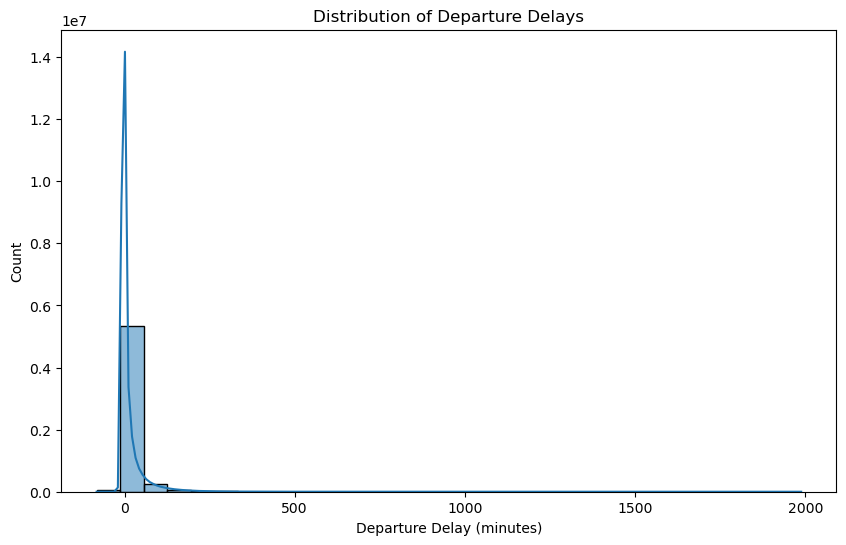

In [97]:
# Departure Delay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=airline_flight_data, x='DEPARTURE_DELAY', bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Count')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


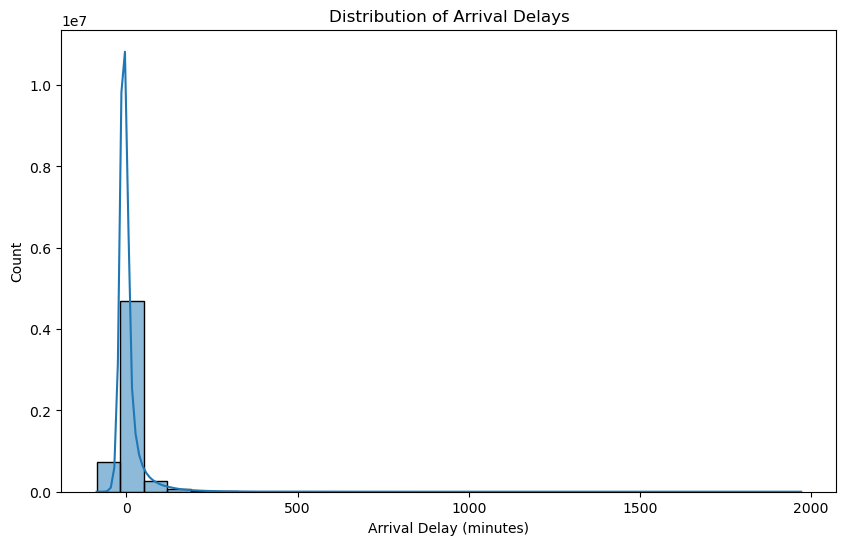

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=airline_flight_data, x='ARRIVAL_DELAY', bins=30, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Distribution of Delay Reasons')

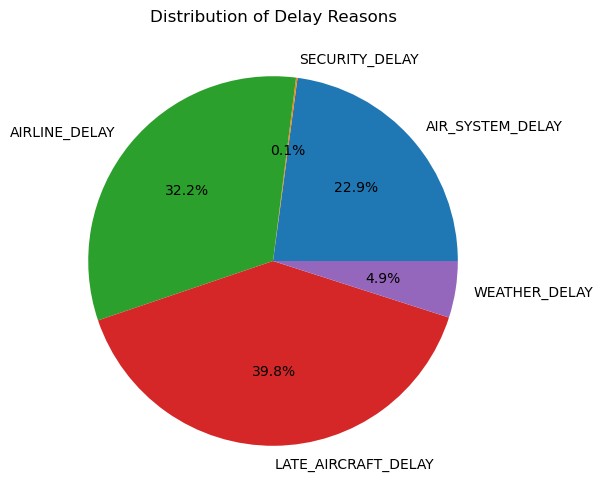

In [164]:
# Delay Reasons Pie Chart
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
delay_counts = airline_flight_data[delay_reasons].sum().values

plt.figure(figsize=(8, 6))
plt.pie(delay_counts, labels=delay_reasons, autopct='%1.1f%%')
plt.title('Distribution of Delay Reasons')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


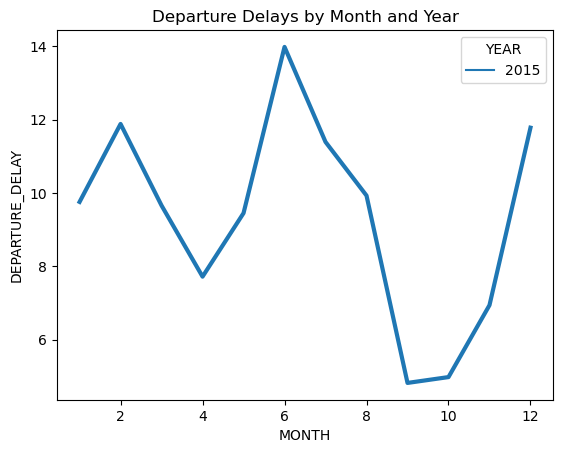

In [165]:
sns.lineplot(data=airline_flight_data, x='MONTH', y='DEPARTURE_DELAY', hue='YEAR', errorbar=None, palette='tab10', linewidth=3)
plt.title('Departure Delays by Month and Year')
plt.show()

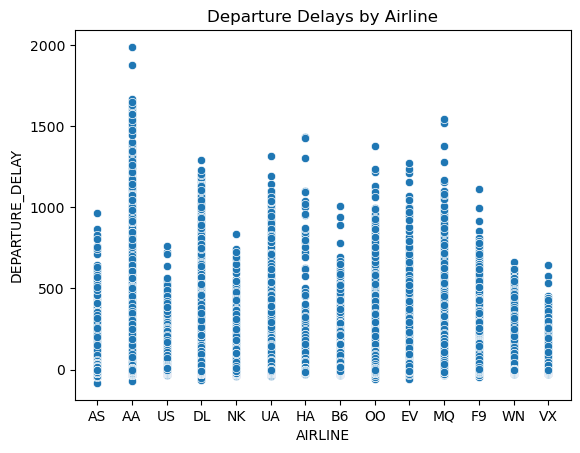

In [171]:
sns.scatterplot(data=airline_flight_data, x='AIRLINE', y='DEPARTURE_DELAY')
plt.title('Departure Delays by Airline')
plt.show()